KeyError: 'map_projection'

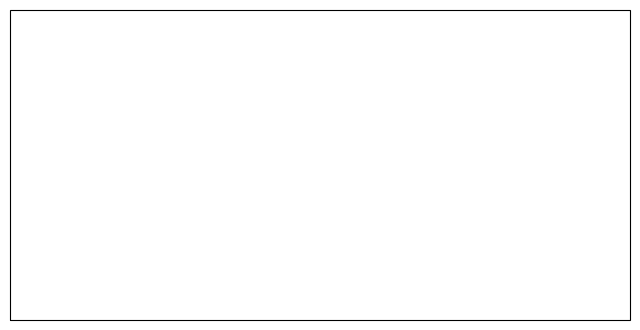

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create the figure and axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Create a GeoAxes instance to allow for projection-specific plotting
geo_ax = GeoAxes(plt.gca(), label=False)
fig.add_axes(geo_ax)

# Generate sample data
lon = np.linspace(-180, 180, 360)
lat = np.linspace(-90, 90, 180)
lon_grid, lat_grid = np.meshgrid(lon, lat)
data = np.sin(np.deg2rad(lat_grid)) * np.cos(np.deg2rad(lon_grid))

# Plot the initial frame
img = geo_ax.imshow(data, cmap='viridis', extent=[-180, 180, -90, 90], origin='lower')

# Configure colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(img, cax=cax)

# Animation update function
def update(frame):
    # Update the data for the next frame
    new_data = np.sin(np.deg2rad(lat_grid + frame)) * np.cos(np.deg2rad(lon_grid))

    # Update the image with the new data
    img.set_array(new_data)

    return [img]

# Create the animation
animation = animation.FuncAnimation(fig, update, frames=360, interval=100, blit=True)

# Show the animation
plt.show()

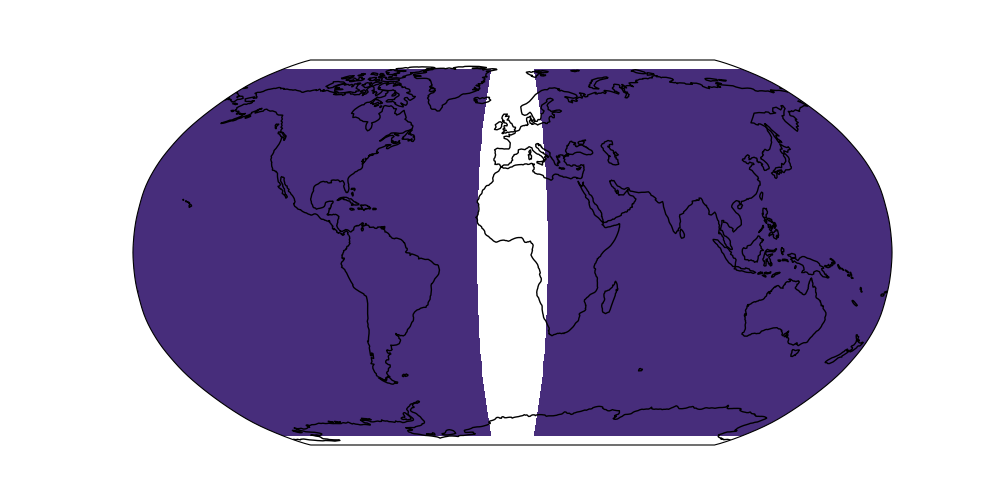

In [1]:
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# import numpy as np
# import cartopy.crs as ccrs
# %matplotlib widget

# fig = plt.figure(figsize=(10, 5))
# ax  = plt.axes(projection=ccrs.Robinson())
# ax.set_global()
# ax.coastlines()

# x          = np.linspace(-80, 80)
# xs, ys     = np.meshgrid(2 * x + 180, x)
# zs         = xs + ys
# vmin, vmax = np.min(zs), np.max(zs)

# mesh = ax.pcolormesh(xs, ys, np.zeros_like(zs), transform=ccrs.PlateCarree(), shading='auto', vmin=vmin, vmax=vmax)

# n = 10


# def update_mesh(t):
#     mesh.set_array(zs.ravel() * t)


# ts = [i / n for i in range(n)]

# # Go back to the start to make it a smooth repeat
# ts += ts[::-1]
# ani = FuncAnimation(fig, update_mesh, frames=ts,
#                     interval=100)

# plt.show()

In [ ]:
# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.
%matplotlib widget

import random
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import matplotlib.animation as animation

Done!


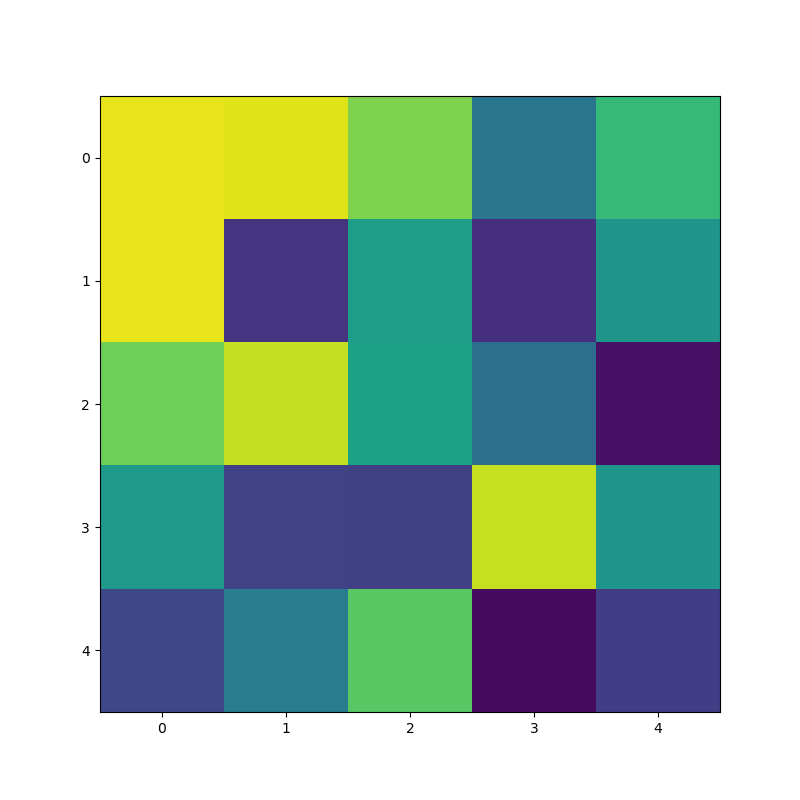

In [11]:
fps       = 3
nSeconds  = 5
snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8, 8) )

a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):

    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

print('Done!')